# K- Means Clusturing

Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data.

Instead of having an output, the data only has an input which would be multiple variables that describe the data.

This is where clustering comes in.

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

However, this post tries to unravel the inner workings of K-Means, a very popular clustering technique. There's also a very good DataCamp post on K-Means, which explains the types of clustering (hard and soft clustering), types of clustering methods (connectivity, centroid, distribution and density) with a case study. The algorithm will help you to tackle unlabeled datasets (i.e. the datasets that do not have any class-labels) and draw your own inferences from them with ease.

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

Link: https://www.datacamp.com/community/tutorials/k-means-clustering-python

# A simple case study of K-Means in Python with the help of Titanic dataset:



One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Now, talking about the dataset, the training set contains several records about the passengers of Titanic (hence the name of the dataset). 

It has 12 features capturing information about passenger_class, port_of_Embarkation, passenger_fare etc.

The dataset's label is survival which denotes the survivial status of a particular passenger. Your task is to cluster the records into two i.e. the ones who survived and the ones who did not.

You might be thinking that since it is a labeled dataset, how could it be used for a clustering task? You just have to drop the 'survival' column from the dataset and make it unlabeled. It's the task of K-Means to cluster the records of the datasets if they survived or not.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

# Step-1 Loading the Data

In [2]:
# Load the train and test datasets to create two DataFrames of titanic scenario data.

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

#  preview the kind of data you will be working with by printing some samples from both the train and test DataFrames.

print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())



***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [3]:
#initial statistics of both the train and test DataFrames using pandas' describe() method.

print("***** Train_Set *****")
print(train.describe())
print(" ")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
 
***** Test_Set *****
       PassengerId      Pclass      

In [4]:
print("Columns of dataset are: ")
print()
print(train.columns.values)

Columns of dataset are: 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Step-2  Understanding  the data.


# 2.a  Preprocesing finding the null values
It is very important to note that not all machine learning algorithms support missing values in the data that you are feeding to them, K-Means being one of them. 

So we need to handle the missing values present in the data. 
 

In [5]:
# see where are the values missing.

# For the train set
train.isna().head()  # This function indicates null values as TRUE aand rest values as FALSE.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:

# For the test set
test.isna().head()   # This function indicates null values as TRUE aand rest values as FALSE.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [7]:
#get the total number of missing values in both datasets.

print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 2.b Imputaing Data frame to Cover Null values.


we can see in the training set, in the columns Age, Cabin and Embarked, there are missing values and in the test set, the Age and Cabin columns contain missing values.

There are a couple of ways to handle missing values:

Remove rows with missing values
Impute missing values
I prefer the latter one because if you remove the rows with missing values it can cause insufficiency in the data which in turn results in inefficient training of the machine learning model.

Now, there are several ways you can perform the imputation:

A constant value that has meaning within the domain, such as 0, distinct from all other values.
A value from another randomly selected record.
A mean, median or mode value for the column.
A value estimated by another machine learning model.
Any imputation performed on the train set will have to be performed on test data in the future when predictions are needed from the final machine learning model. This needs to be taken into consideration when choosing how to impute the missing values.

Pandas provides the "fillna()" function for replacing missing values with a specific value. so apply that with Mean Imputation.

In [8]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

#  any missing values in the train set
print ("Train set")
print()
print(train.isna().sum())
print()
# any missing values in the test set
print ("Test set")
print()
print(test.isna().sum())

Train set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# 2.c finding out feautures that  are categorical(boolean) and continous(numeric).

Understanding is really required in order to perform any Machine Learning task. Let's start with finding out which features are categorical and which are numerical.

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Continuous: Age, Fare. Discrete: SibSp, Parch.
Two features are left out which are not listed above in any of the categories, they are 

 1. Ticket 
 
 2. Cabin. 
 
where Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. 

In [9]:
#Let see some sample values.
train['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [10]:
train['Cabin'].head(8)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
Name: Cabin, dtype: object

Let's see the survival count of passengers with respect to the following features:

1. Pclass
2. Sex
3. SibSp
4. Parch

In [11]:
# Survival count with respect to Pclass:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
#Survival count with respect to Sex:

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Sex,Survived
0,female,0.742038
1,male,0.188908


 Here the observation is survival rate of female passengers is significantly higher for males

In [13]:
# Survival count with respect to SibSp:

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Survival count with respect to Parch:

train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# 2.D Plotting the graphs (THESE ARE OPTIONAL)

We plot the graphs of

1. Pclass and Survived features
2. Age vs. Survived


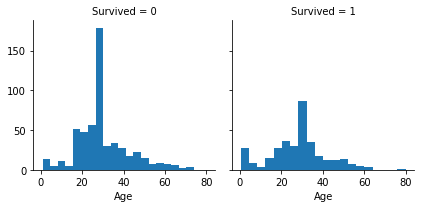

In [17]:
# Age vs. Survived

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

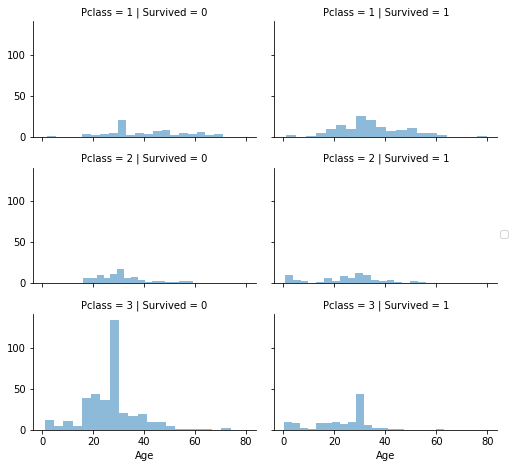

In [18]:
# Pclass and Survived features

grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 2.E  Data preprocessing to make all the feature values are of same type.

we need some data preprocessing as well.we see that not all the feature values are of same type. Some of them are numerical and some of them are not. 

So,In order to ease the computation, you will feed all numerical data to the model. 

In [20]:
# Let's see the data types of different features that you have:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So, WE see that the following features are non-numeric:

1. Name
2. Sex
3. Ticket
4. Cabin
5. Embarked

Before converting them into numeric ones, WE might want to do some feature engineering, i.e. features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status of the passengers.

Often, it is better to train your model with only significant features than to train it with all the features, including unnecessary ones.

It not only helps in efficient modelling, but also the training of the model can happen in much lesser time. Although, feature engineering is a whole field of study itself, know that the features Name, Ticket, Cabin and Embarked can be dropped and they will not have significant impact on the training of the K-Means model.

Here we are removing the unnessacry columns that are not numeric and have less impact on prediction.

In [21]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

Now that the dropping part is done let's convert the 'Sex' feature to a numerical one (only 'Sex' is remaining now which is a non-numeric feature). You will do this using a technique called Label Encoding.

In [22]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


you are good to go to train your K-Means model now.

You can first drop the Survival column from the data with the drop() function.

In [26]:
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])
#You can review all the features you are going to feed to the algorithm with train.info().
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Step-3 Building the K-Means model.

In [33]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
scaler = MinMaxScaler() # Scale the data
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)

# Algorithm

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
# model is doing by looking at the percentage of passenger records that were clustered correctly.

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263
